## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [8]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-03-08 23:13:59,247] Making new env: Taxi-v2


In [9]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [13]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward
    
        
    

0.0405574255687


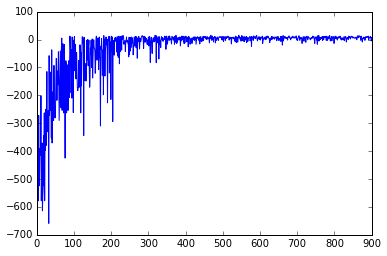

In [7]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print agent.epsilon
        plt.plot(rewards)
        plt.show()
        

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

In [15]:
#run xvfb and set %env DISPLAY=:1 if in binder or on a server
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
# plt.imshow(env.render('rgb_array'))

[2017-03-08 23:16:26,542] Making new env: CartPole-v0


first state:[-0.03544501 -0.02808353 -0.04649709  0.01973391]


 ** Ok, let's binarize **

In [16]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self,state):
        state[0] = int(2 * state[0])
        state[1] = int(10 * state[1])
        state[2] = int(50 * state[2])
        state[3] = int(20 * state[3])
        #state = <round state to some amount digits.>
        #hint: you can do that with round(x,n_digits)
        #you will need to pick a different n_digits for each dimension

        return tuple(state)

In [17]:
env = Binarizer(gym.make("CartPole-v0"))

[2017-03-08 23:16:28,525] Making new env: CartPole-v0


In [18]:
agent = QLearningAgent(alpha=0.1,epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [19]:
reward = []

mean reward 783.54


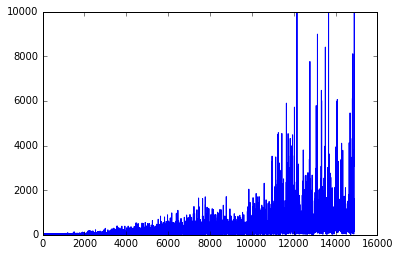

In [20]:
for i in range(15000):
#     print i
    reward.append(play_and_train(env,agent))    
    if i > 10000:
        agent.epsilon *= 0.999
    if i %100 ==0:
        clear_output(True)
        print "mean reward",np.mean(reward[-100:])
        plt.plot(reward)
        plt.show()

In [21]:
def generate_session(t_max=10 ** 4):
    states,actions = [],[]
    total_reward = 0
    
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        states.append(s)
        actions.append(a)
        s = next_s
        total_reward +=r
        
        if done:break
    return states,actions,total_reward

In [23]:
env=Binarizer(gym.make("CartPole-v0"))
env.reset()

[2017-03-08 23:19:08,510] Making new env: CartPole-v0


(0.0, 0.0, 1.0, 0.0)

In [24]:
import gym.wrappers
env = gym.wrappers.Monitor(env,directory="videos",force=True)
sessions = [generate_session() for _ in range(100)]
env.close()
#unwrap 
env = env.env.env
#upload to gym
# gym.upload("./videos/",api_key="sk_QqOIccK6Qxu4jbPHswDn8w")

[2017-03-08 23:19:09,260] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-03-08 23:19:09,261] Creating monitor directory videos
[2017-03-08 23:19:09,263] Starting new video recorder writing to /home/dmitry/Downloads/videos/openaigym.video.0.8487.video000000.mp4
[2017-03-08 23:19:13,320] Starting new video recorder writing to /home/dmitry/Downloads/videos/openaigym.video.0.8487.video000001.mp4
[2017-03-08 23:19:16,783] Starting new video recorder writing to /home/dmitry/Downloads/videos/openaigym.video.0.8487.video000008.mp4
[2017-03-08 23:19:20,296] Starting new video recorder writing to /home/dmitry/Downloads/videos/openaigym.video.0.8487.video000027.mp4
[2017-03-08 23:19:23,969] Starting new video recorder writing to /home/dmitry/Downloads/videos/openaigym.video.0.8487.video00006

In [25]:
gym.upload("./videos/",api_key="sk_QqOIccK6Qxu4jbPHswDn8w") #you'll need me later

[2017-03-08 23:19:30,953] [CartPole-v0] Uploading 100 episodes of training data
[2017-03-08 23:19:33,688] [CartPole-v0] Uploading videos of 5 training episodes (62162 bytes)
[2017-03-08 23:19:34,878] [CartPole-v0] Creating evaluation object from ./videos/ with learning curve and training video
[2017-03-08 23:19:35,492] 
****************************************************
You successfully uploaded your evaluation on CartPole-v0 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_qMr8MnSHTvmIVN6Aqn0Skw

****************************************************
